# Evaluating model on IRIS data set

In [3]:
import numpy as np 
from sklearn.datasets import load_iris
from sklearn.model_selection import validation_curve
from sklearn import svm 

X, y = load_iris(return_X_y=True)

In [119]:
from sklearn.utils import shuffle
X, y = shuffle(X, y, random_state=0)

train_scores, valid_scores = validation_curve(svm.SVC(kernel='linear'), X, y, param_name='C', param_range=np.logspace(-7, 3, 10))
train_scores, valid_scores

(array([[0.9       , 0.925     , 0.93333333, 0.91666667, 0.925     ],
        [0.9       , 0.925     , 0.93333333, 0.91666667, 0.925     ],
        [0.9       , 0.925     , 0.93333333, 0.91666667, 0.925     ],
        [0.9       , 0.925     , 0.93333333, 0.91666667, 0.925     ],
        [0.9       , 0.925     , 0.93333333, 0.91666667, 0.925     ],
        [0.95      , 0.95      , 0.96666667, 0.96666667, 0.95833333],
        [0.98333333, 0.98333333, 0.99166667, 0.99166667, 0.975     ],
        [0.98333333, 0.975     , 0.98333333, 0.975     , 0.98333333],
        [0.975     , 0.98333333, 0.99166667, 0.975     , 0.98333333],
        [0.98333333, 0.98333333, 1.        , 0.98333333, 0.98333333]]),
 array([[0.93333333, 0.9       , 0.96666667, 0.93333333, 0.83333333],
        [0.93333333, 0.9       , 0.96666667, 0.93333333, 0.83333333],
        [0.93333333, 0.9       , 0.96666667, 0.93333333, 0.83333333],
        [0.93333333, 0.9       , 0.96666667, 0.93333333, 0.83333333],
        [0.9333333

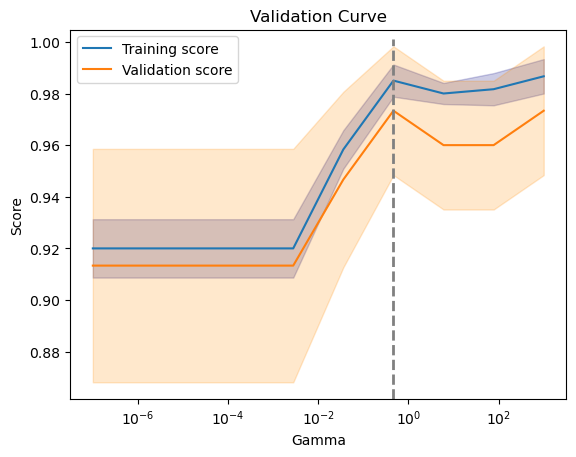

In [120]:
import matplotlib.pyplot as plt 

param_range = np.logspace(-7, 3, 10)

train_mean = np.mean(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

best_idx = np.argmax(valid_mean)

plt.figure()
plt.plot(param_range, train_mean, label='Training score')
plt.plot(param_range, valid_mean, label='Validation score')
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.2, color='navy')
plt.fill_between(param_range, valid_mean - valid_std, valid_mean  + valid_std, alpha=0.2, color='darkorange')
plt.axvline(x=param_range[best_idx], color='gray', linestyle='--', ymin=0, ymax=valid_mean[best_idx], linewidth=2)
plt.xlabel('Gamma')
plt.ylabel('Score')
plt.title('Validation Curve')
plt.xscale('log')
plt.legend()
plt.show()

In [132]:
from sklearn.model_selection import learning_curve

X, y = shuffle(X, y, random_state=11)
train_size, train_scores, valid_scores = learning_curve(svm.SVC(kernel='linear'), X, y, train_sizes=[50, 60, 70, 80, 90, 100], cv=3)
train_size, train_scores, valid_scores

(array([ 50,  60,  70,  80,  90, 100]),
 array([[1.        , 0.98      , 0.98      ],
        [0.98333333, 0.98333333, 0.98333333],
        [1.        , 0.98571429, 0.98571429],
        [0.975     , 0.9625    , 0.9875    ],
        [0.98888889, 0.97777778, 0.98888889],
        [0.98      , 0.98      , 0.99      ]]),
 array([[0.98, 0.98, 0.94],
        [0.98, 0.98, 0.96],
        [0.98, 1.  , 0.92],
        [0.98, 1.  , 0.94],
        [0.96, 1.  , 0.96],
        [0.98, 1.  , 0.96]]))

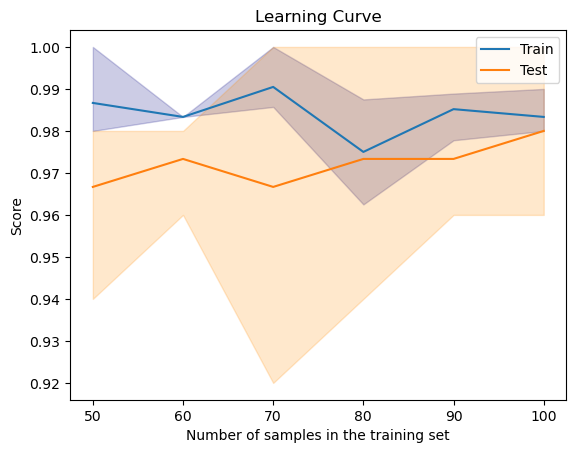

In [133]:
train_mean = np.mean(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
train_max = [max(scores) for scores in train_scores]
train_min = [min(scores) for scores in train_scores]
valid_max = [max(scores) for scores in valid_scores]
valid_min = [min(scores) for scores in valid_scores]


plt.figure()
plt.plot(train_size, train_mean, label='Train')
plt.plot(train_size, valid_mean, label='Test')
plt.fill_between(train_size, train_min, train_max, alpha=0.2, color='navy')
plt.fill_between(train_size, valid_min, valid_max, alpha=0.2, color='darkorange')
plt.xlabel('Number of samples in the training set')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend()
plt.show()